In [1]:
#---------------------- Header 
from easydict import EasyDict
import os
import json
args = EasyDict()

#------ image list 
i_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS/0-Pusan-2023-AO_16_K3_20231028043354_61071_09341261_L1G_PS.png"

#------ tif list 
t_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS/K3_20231028043354_61071_09341261_L1G_PRGB_georeferencing_32652.tif"

#------ Coordinates filtering function
args.txt_path = None

args.xml_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS/K3_20231028043354_61071_09341261_L1G_Aux.xml"


#------ gpu
args.gpu_id = 0

#------ model 
args.img_path = i_1

print( '/'.join( args.img_path.split("/")[0:-1]) )
args.infer_threshold = 0.2
args.infer_threshold_showing = 0.2
source_root ='/'.join( args.img_path.split("/")[0:-1])

args.img_output = args.img_path.replace(".png" ,"_output_v1_0130.png")
args.img_output_masked = args.img_path.replace(".png" ,"_output_v1_0130_Masked.png")
args.img_output_scatter = args.img_path.replace(".png" ,"_output_v1_0130_Scatter.png")

args.csv_output = args.img_path.replace(".png","_output_v1_0130.csv")
args.csv_output_masked =args.img_path.replace(".png","_masked_v1_0130.csv")
args.csv_output_scatter = args.img_path.replace(".png","_scatter_v1_0130.csv")


#------ Map Shape 
# old mask
#args.map_path = os.path.join(source_root, "map")
#args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Old"
# new mask 
args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Korea_Clipped"


#------ TIF 
args.tf_path = t_1

# time 2023 05 23 04 50 50
args.year_= int( i_1 .split("/")[-2].split("_")[1][0:4])
args.month_ = int(i_1 .split("/")[-2].split("_")[1][4:6])
args.day_ = int(i_1 .split("/")[-2].split("_")[1][6:8])
hour_ = int(i_1 .split("/")[-2].split("_")[1][8:10])
args.hour_ = hour_ + 9
args.min  = int(i_1 .split("/")[-2].split("_")[1][10:12]) 
args.sec =  0
print("time : ", args.year_, args.month_, args.day_, args.hour_, args.min)

#------ AIS csv ---------------------------------------------------------------------------

ais_root_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/1차-3개"
ais_root_2 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개"

if str(args.year_) == "2022":
    ais_root = ais_root_1
elif str(args.year_) == "2023":
    ais_root = ais_root_2


#-------
if len(str(args.month_)) ==1:
    args.month_ = str("0") + str(args.month_)

if len(str(args.day_)) ==1:
    args.day_ = str("0") + str(args.day_)

print(str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv"))
csv_name = str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv")
args.data_path = os.path.join( ais_root , csv_name)
print(args.data_path)
if os.path.exists(args.data_path):
    print("#------------------ : csv exists")
else:
    print("#------------------ : no csv found")

args.static_data_path = args.data_path.replace("_dynamic.csv","_static.csv")
args.final_merge = args.img_path.replace(".png",".csv")

# time gap
# 시각화 결과물에서 ais 좌표가 해상도가 더 높아지게 된다. 
args.time_gap_min = 5
args.time_gap_sec = False

#--------------------------------------------------------------------------------------------

# pixel gap 
# this is for visualization
args.pixel_gap = 200

# # latlon gap 
# # 매칭되는 박스와 ais 간의 기준 => 늘리면 R_ 데이터프레임에서 매칭 케이스가 늘어나게 된다. 
# args.latlon_gap = 0.000001

#------ Model Inference 
args.model_test = False
args.Box_Matching = True
args.png_draw_save = False


# Save EasyDict to a file
file_path = os.path.join(source_root ,"config.json" )
with open(file_path, 'w') as json_file:
    json.dump(args, json_file, indent=4)

/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341261_L1G_PS
time :  2023 10 28 13 33
202310281300_dynamic.csv
/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개/202310281300_dynamic.csv
#------------------ : csv exists


In [2]:
# # get time

# from PIL import Image
# from PIL.TiffTags import TAGS

# with Image.open(args.tf_path ) as img:
#     meta_dict = {TAGS[key] : img.tag[key] for key in img.tag}

# import rasterio
# meta_dict_r = rasterio.open(args.tf_path)

In [3]:
# '''
# raterio 로, tif 에서 spatial-resolution 찾는 방법
# 아니면 그냥 xml 들어가서 "gsd" 로 키워드 찾으면 나온다. 


# Metadata:
  
#   TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)

# '''

# meta_dict_r.res



In [4]:
from datetime import datetime

# Your input string
input_string =  str(args.year_) + str(args.month_) + str(args.day_) + str(args.hour_) +  str(args.min)

# Specify the format of the input string
input_format = "%Y%m%d%H%M"

# Convert the string to a datetime object
datetime_object = datetime.strptime(input_string, input_format)

# Now you have a datetime object, and you can work with it as needed
print(datetime_object)


2023-10-28 13:33:00


In [5]:
input_string

'202310281333'

In [6]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (1008255248 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [7]:
img_.size

(35308, 28556)

In [8]:
!nvidia-smi

Wed Jan 31 15:22:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090        On  | 00000000:3B:00.0 Off |                  N/A |
|  0%   30C    P8              32W / 350W |     12MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 1. Model Inference

In [9]:
import testModule

#0-Pusan-2023-AO_10_K3_20230328042158_57944_09401261_L1G_PS

if args.model_test:
    result = testModule.infer_model(input_file_path=args.img_path,\
                        thres=args.infer_threshold , gpu_id = 0)

#------------------------
# result save
import numpy as np
import os 
save_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/Inference_results"
file_name = args.img_path.split("/")[-1].split(".")[0]+".npy"    

if args.model_test == False:
    result = np.load(os.path.join(save_root,file_name))
else:
    print("Result Saved")
    np.save(os.path.join(save_root,file_name), result)

# 2. AIS csv 

- time condition 에 맞게 filtering 

In [10]:
import pandas as pd

df = pd.read_csv(args.data_path)

In [11]:
#---- current time ----#
import datetime
year_= args.year_
month_ = args.month_ 
day_ = args.day_
hour_ = args.hour_
min  = args.min
sec =  args.sec
crit_time_str = f"{year_}-{month_}-{day_} {hour_}:{min}:{sec}"
date = pd.to_datetime(crit_time_str)

#---- time condition ----#
time_gap_min = args.time_gap_min
time_gap_sec = args.time_gap_sec

earl_time = date - datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)
post_time = date + datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)

print("early : ",earl_time)
print("now : ",date)
print("late : ",post_time)



early :  2023-10-28 13:28:00
now :  2023-10-28 13:33:00
late :  2023-10-28 13:38:00


In [12]:
df.columns

Index(['mmsi_', 'time', 'lon_', 'lat_', 'heading_', 'turn_', 'speed_'], dtype='object')

In [13]:
df.columns = ['mmsi_', 'time', 'long', 'lat', 'heading_', 'turn_', 'speed_']

In [14]:
df

mmsi_                 time        long        lat  heading_  turn_  \
0      440066260  2023-10-28 13:00:00  129.049983  35.120033      46.0   -0.0   
1      440233000  2023-10-28 13:00:00  129.170682  35.022577     128.0   32.0   
2      440130790  2023-10-28 13:00:00  129.142168  35.084848     511.0 -128.0   
3      440120570  2023-10-28 13:00:00  128.993715  35.027598     258.0   -6.0   
4      440546000  2023-10-28 13:00:00  128.858783  34.773983      65.0    0.0   
...          ...                  ...         ...        ...       ...    ...   
39299  440204350  2023-10-28 13:59:59  129.074795  35.090592     511.0 -128.0   
39300  440110910  2023-10-28 13:59:59  129.065777  35.109070     359.0   -6.0   
39301  440023940  2023-10-28 13:59:59  129.032077  35.091743     511.0 -128.0   
39302  440154430  2023-10-28 13:59:59  129.204232  35.137183      41.0    0.0   
39303  355674000  2023-10-28 13:59:59  129.044665  35.024073     220.0    2.0   

       speed_  
0         0.0  
1        32.3  
2        10.4  
3         6.7  
4        11.5  
...       ...  
39299     0.0  
39300     0.0  
39301     0.0  
39302    11.3  
39303     2.7  

[39304 rows x 7 columns]

In [15]:
#---- filtering datetime ---# 
# 
time_ = []
for i,row in df.iterrows():
    #print(row["time"])
    time_.append( pd.to_datetime( row["time"] ) )
df["datetime"] = time_

con1 = df["datetime"] < post_time 
con2 = df["datetime"] > earl_time

#--- exec ---#
time_filter_flag = True

if time_filter_flag:
    t_df = df.loc[con1 & con2] 
    df.loc[con1 & con2]
else:
    t_df = df
    t_df

In [16]:
t_df

mmsi_                 time        long        lat  heading_  turn_  \
16536  441743000  2023-10-28 13:28:01  129.257853  34.969650     256.0    0.0   
16537  440101600  2023-10-28 13:28:01  129.081750  35.083377     511.0 -128.0   
16538  370388000  2023-10-28 13:28:01  129.360148  35.096098     198.0   -5.0   
16539  440148520  2023-10-28 13:28:01  129.065853  35.109188      94.0    0.0   
16540  273443750  2023-10-28 13:28:01  129.033913  35.093552     258.0    0.0   
...          ...                  ...         ...        ...       ...    ...   
23640  273426890  2023-10-28 13:37:59  129.065293  35.097973      27.0    0.0   
23641  457890000  2023-10-28 13:37:59  129.060877  35.099730     511.0 -128.0   
23642  441067000  2023-10-28 13:37:59  129.242722  34.991862     219.0 -128.0   
23643  440323340  2023-10-28 13:37:59  129.050907  35.119528      50.0    0.0   
23644  440054060  2023-10-28 13:37:59  129.171855  34.939825      48.0   -2.0   

       speed_            datetime  
16536    16.3 2023-10-28 13:28:01  
16537     0.1 2023-10-28 13:28:01  
16538    12.3 2023-10-28 13:28:01  
16539     0.0 2023-10-28 13:28:01  
16540     0.0 2023-10-28 13:28:01  
...       ...                 ...  
23640     0.0 2023-10-28 13:37:59  
23641     0.1 2023-10-28 13:37:59  
23642     8.6 2023-10-28 13:37:59  
23643     0.0 2023-10-28 13:37:59  
23644    13.2 2023-10-28 13:37:59  

[7109 rows x 8 columns]

# 3. Coordinates filtering


In [17]:
# Coordinates filtering function ! 

if args.txt_path != None:
    txt_path = args.txt_path
    f = open(txt_path,'r')
    lines = f.readlines()
    lines

    top_left =     lines[1]
    bottom_right = lines[-1]

    min_long = float( top_left.split(":")[1].split(",")[1][0:10] )
    max_long = float( bottom_right.split(":")[1].split(",")[1][0:10] ) 

    min_lat  = float( bottom_right.split(":")[1].split(",")[0][0:10] ) 
    max_lat  = float( top_left.split(":")[1].split(",")[0][0:10] ) 

elif args.xml_path != None:
    # XML parsing
    import xml.etree.ElementTree as ET

    xml_path = args.xml_path
    tree = ET.parse(args.xml_path)
    root = tree.getroot() 


    Top_left = []
    Bottom_right = []

    for child in root:
        if child.tag =="Image":
            print(child)
            for grand_child in child:
                if grand_child.tag =="PAN":
                    for gg_child in grand_child:
                        #print(gg_child.tag)
                        if gg_child.tag == "ImagingCoordinates":
                            for ggg in gg_child:
                                
                                if ggg.tag =="ImageGeogTL":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Top_left.append(float(ggg[0].text))
                                    Top_left.append(float(ggg[1].text))
                                elif ggg.tag == "ImageGeogBR":
                                    # print(ggg.tag)                         
                                    # print(ggg[0].text)
                                    # print(ggg[1].text)
                                    Bottom_right.append(float(ggg[0].text))
                                    Bottom_right.append(float(ggg[1].text))
    
    min_long = Top_left[1]
    max_long = Bottom_right[1]
    min_lat = Bottom_right[0]
    max_lat = Top_left[0]

# 35.032614576
# 128.632902263
# ImageGeogBR
# 34.852878881
# 128.904069499

print(min_long,max_long,min_lat,max_lat)
                                

<Element 'Image' at 0x7fc1cd4148b0>
128.632902263 128.904069499 34.852878881 35.032614576


# 3.1 공간해상도 구하기

- (max_long - min_long) / image_size of x 

In [18]:
x_max , y_max = img_.size

In [19]:
max_long - min_long

0.2711672359999966

In [20]:
# pixel 당 2.19 long
(max_long - min_long) / x_max

7.680050866659017e-06

In [21]:
# pixel 당 1.12 lat 
(max_lat - min_lat) / y_max

6.294148165009034e-06

In [22]:
import math

def measure(lat1, lon1, lat2, lon2):
    # Radius of Earth in KM
    R = 6378.137
    
    # Convert degrees to radians
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    
    a = math.sin(dLat/2) * math.sin(dLat/2) + \
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * \
        math.sin(dLon/2) * math.sin(dLon/2)
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    
    # Convert distance to meters
    return d * 1000

In [23]:
a_ = measure(20,max_long, 20, min_long)
print(a_)
meter_per_pixel = a_ / x_max
print(meter_per_pixel)

28365.745006624045
0.8033801123434928


In [24]:
# def measure_lat_lon_meter(lat1, lon1, lat2, lon2):
#     ar R = 6378.137; // Radius of earth in KM
#     var dLat = lat2 * Math.PI / 180 - lat1 * Math.PI / 180;
#     var dLon = lon2 * Math.PI / 180 - lon1 * Math.PI / 180;
#     var a = Math.sin(dLat/2) * Math.sin(dLat/2) +
#     Math.cos(lat1 * Math.PI / 180) * Math.cos(lat2 * Math.PI / 180) *
#     Math.sin(dLon/2) * Math.sin(dLon/2);
#     var c = 2 * Math.atan2(Math.sqrt(a), Math.sqrt(1-a));
#     var d = R * c;

In [25]:
con1 = t_df["long"] > min_long
con2 = t_df["long"] < max_long

con3 = t_df["lat"] > min_lat
con4 = t_df["lat"] < max_lat + 0.0225 # debugged by eric 


#------------------------------------
location_filter_flag = True

if location_filter_flag == True:
    #q_df = df.loc[con1 & con2 & con3 & con4]
    q_df = t_df.loc[con1 & con2 & con3 & con4]
    q_df
else:
    q_df = df

In [26]:
q_df

mmsi_                 time        long        lat  heading_  turn_  \
16608  440328000  2023-10-28 13:28:09  128.835178  34.941688     335.0    0.0   
16808  440328000  2023-10-28 13:28:29  128.834753  34.942528     335.0    0.0   
17374  440328000  2023-10-28 13:29:29  128.833485  34.945050     334.0    0.0   
17553  440328000  2023-10-28 13:29:48  128.833087  34.945860     334.0    0.0   
17757  440328000  2023-10-28 13:30:08  128.832667  34.946695     334.0    0.0   
17976  440328000  2023-10-28 13:30:29  128.832225  34.947560     335.0    0.0   
18172  440328000  2023-10-28 13:30:48  128.831827  34.948352     335.0    0.0   
18410  440328000  2023-10-28 13:31:08  128.831383  34.949230     334.0   -0.0   
18865  440328000  2023-10-28 13:31:48  128.830555  34.950853     334.0   -0.0   
18916  440172660  2023-10-28 13:31:52  128.885967  34.992367     255.0    0.0   
19614  440328000  2023-10-28 13:32:48  128.829267  34.953345     334.0    0.0   
19617  477925100  2023-10-28 13:32:48  128.812667  34.889083     203.0    0.0   
19864  440328000  2023-10-28 13:33:08  128.828825  34.954170     334.0    0.0   
20039  370025000  2023-10-28 13:33:21  128.778055  34.860250     194.0    2.0   
20146  440328000  2023-10-28 13:33:29  128.828360  34.955032     334.0   -1.0   
20405  440328000  2023-10-28 13:33:48  128.827940  34.955807     334.0   -0.0   
20668  440328000  2023-10-28 13:34:08  128.827465  34.956665     334.0    0.0   
21013  440172660  2023-10-28 13:34:33  128.883795  34.992437     260.0    0.0   
21128  440146890  2023-10-28 13:34:41  128.875793  34.936138     511.0 -128.0   
21226  440328000  2023-10-28 13:34:48  128.826588  34.958250     334.0    0.0   
21504  440328000  2023-10-28 13:35:08  128.826142  34.959053     334.0    0.0   
21768  440328000  2023-10-28 13:35:29  128.825678  34.959888     334.0    1.0   
21822  440172660  2023-10-28 13:35:33  128.882970  34.992492     260.0    0.0   
22017  440328000  2023-10-28 13:35:48  128.825262  34.960638     335.0    0.0   
22551  440328000  2023-10-28 13:36:29  128.824385  34.962233     335.0    1.0   
23240  440328000  2023-10-28 13:37:28  128.823118  34.964527     335.0    0.0   

       speed_            datetime  
16608     9.8 2023-10-28 13:28:09  
16808     9.8 2023-10-28 13:28:29  
17374     9.8 2023-10-28 13:29:29  
17553     9.8 2023-10-28 13:29:48  
17757     9.7 2023-10-28 13:30:08  
17976     9.7 2023-10-28 13:30:29  
18172     9.7 2023-10-28 13:30:48  
18410     9.7 2023-10-28 13:31:08  
18865     9.7 2023-10-28 13:31:48  
18916     2.2 2023-10-28 13:31:52  
19614     9.7 2023-10-28 13:32:48  
19617     0.2 2023-10-28 13:32:48  
19864     9.7 2023-10-28 13:33:08  
20039     0.3 2023-10-28 13:33:21  
20146     9.7 2023-10-28 13:33:29  
20405     9.6 2023-10-28 13:33:48  
20668     9.6 2023-10-28 13:34:08  
21013     2.3 2023-10-28 13:34:33  
21128     3.3 2023-10-28 13:34:41  
21226     9.6 2023-10-28 13:34:48  
21504     9.5 2023-10-28 13:35:08  
21768     9.4 2023-10-28 13:35:29  
21822     2.4 2023-10-28 13:35:33  
22017     9.3 2023-10-28 13:35:48  
22551     9.1 2023-10-28 13:36:29  
23240     8.9 2023-10-28 13:37:28

In [27]:
import utm
import rasterio

#-------------------
# utm => pixels 
#------------------
utm_array =[] # long lat 
#--- csv 
# latlong --> utm
for lat,lon in zip(q_df['lat'].values,q_df['long'].values):
    #print(lat)
    # if lat < 80:
    res = utm.from_latlon(lat,lon,52,"N")
    utm_array.append(res)

# 전환한 utm_array 를 데이터프레임에 병합 
q_df['utm_array']= utm_array


pixels_=[] # utm_array 를 pixels_ 로 변경 
tf_path = args.tf_path
with rasterio.open(tf_path) as map_layer:

    for inp in utm_array:
    
        coords2pixels = map_layer.index(inp[0],inp[1]) #input lon,lat # 좌표계 
        pixels_.append(coords2pixels)

q_df['pixels'] = pixels_

#--- init index in q_df
q_df.drop_duplicates(inplace=True)
q_df.reset_index(inplace=True,drop=True)


/tmp/ipykernel_159820/3391268297.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['utm_array']= utm_array
/tmp/ipykernel_159820/3391268297.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['pixels'] = pixels_
/tmp/ipykernel_159820/3391268297.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df.drop_dup

In [28]:
# # remove duplicate row 
# [i[1:-1] for i in q_df['time']]
# # pd.to_datetime( )

In [29]:
q_df

mmsi_                 time        long        lat  heading_  turn_  \
0   440328000  2023-10-28 13:28:09  128.835178  34.941688     335.0    0.0   
1   440328000  2023-10-28 13:28:29  128.834753  34.942528     335.0    0.0   
2   440328000  2023-10-28 13:29:29  128.833485  34.945050     334.0    0.0   
3   440328000  2023-10-28 13:29:48  128.833087  34.945860     334.0    0.0   
4   440328000  2023-10-28 13:30:08  128.832667  34.946695     334.0    0.0   
5   440328000  2023-10-28 13:30:29  128.832225  34.947560     335.0    0.0   
6   440328000  2023-10-28 13:30:48  128.831827  34.948352     335.0    0.0   
7   440328000  2023-10-28 13:31:08  128.831383  34.949230     334.0   -0.0   
8   440328000  2023-10-28 13:31:48  128.830555  34.950853     334.0   -0.0   
9   440172660  2023-10-28 13:31:52  128.885967  34.992367     255.0    0.0   
10  440328000  2023-10-28 13:32:48  128.829267  34.953345     334.0    0.0   
11  477925100  2023-10-28 13:32:48  128.812667  34.889083     203.0    0.0   
12  440328000  2023-10-28 13:33:08  128.828825  34.954170     334.0    0.0   
13  370025000  2023-10-28 13:33:21  128.778055  34.860250     194.0    2.0   
14  440328000  2023-10-28 13:33:29  128.828360  34.955032     334.0   -1.0   
15  440328000  2023-10-28 13:33:48  128.827940  34.955807     334.0   -0.0   
16  440328000  2023-10-28 13:34:08  128.827465  34.956665     334.0    0.0   
17  440172660  2023-10-28 13:34:33  128.883795  34.992437     260.0    0.0   
18  440146890  2023-10-28 13:34:41  128.875793  34.936138     511.0 -128.0   
19  440328000  2023-10-28 13:34:48  128.826588  34.958250     334.0    0.0   
20  440328000  2023-10-28 13:35:08  128.826142  34.959053     334.0    0.0   
21  440328000  2023-10-28 13:35:29  128.825678  34.959888     334.0    1.0   
22  440172660  2023-10-28 13:35:33  128.882970  34.992492     260.0    0.0   
23  440328000  2023-10-28 13:35:48  128.825262  34.960638     335.0    0.0   
24  440328000  2023-10-28 13:36:29  128.824385  34.962233     335.0    1.0   
25  440328000  2023-10-28 13:37:28  128.823118  34.964527     335.0    0.0   

    speed_            datetime  \
0      9.8 2023-10-28 13:28:09   
1      9.8 2023-10-28 13:28:29   
2      9.8 2023-10-28 13:29:29   
3      9.8 2023-10-28 13:29:48   
4      9.7 2023-10-28 13:30:08   
5      9.7 2023-10-28 13:30:29   
6      9.7 2023-10-28 13:30:48   
7      9.7 2023-10-28 13:31:08   
8      9.7 2023-10-28 13:31:48   
9      2.2 2023-10-28 13:31:52   
10     9.7 2023-10-28 13:32:48   
11     0.2 2023-10-28 13:32:48   
12     9.7 2023-10-28 13:33:08   
13     0.3 2023-10-28 13:33:21   
14     9.7 2023-10-28 13:33:29   
15     9.6 2023-10-28 13:33:48   
16     9.6 2023-10-28 13:34:08   
17     2.3 2023-10-28 13:34:33   
18     3.3 2023-10-28 13:34:41   
19     9.6 2023-10-28 13:34:48   
20     9.5 2023-10-28 13:35:08   
21     9.4 2023-10-28 13:35:29   
22     2.4 2023-10-28 13:35:33   
23     9.3 2023-10-28 13:35:48   
24     9.1 2023-10-28 13:36:29   
25     8.9 2023-10-28 13:37:28   

                                          utm_array          pixels  
0   (484949.05057347036, 3866588.9155630465, 52, N)  (14436, 26333)  
1      (484910.394947157, 3866682.131639439, 52, N)  (14303, 26278)  
2    (484795.07239367574, 3866962.001670247, 52, N)  (13903, 26113)  
3   (484758.87980750954, 3867051.8874851456, 52, N)  (13775, 26062)  
4     (484720.6837359197, 3867144.549202965, 52, N)  (13643, 26007)  
5   (484680.48520527215, 3867240.5413273484, 52, N)  (13506, 25950)  
6    (484644.2915106249, 3867328.4315236155, 52, N)  (13380, 25898)  
7     (484603.9144178435, 3867425.865964536, 52, N)  (13241, 25841)  
8    (484528.6162179101, 3867605.9770527254, 52, N)  (12984, 25733)  
9   (489593.33151830867, 3872202.5332208374, 52, N)   (6425, 32961)  
10  (484411.48544624477, 3867882.5286201043, 52, N)  (12590, 25566)  
11    (482882.5079564369, 3860758.909777679, 52, N)  (22756, 23384)  
12   (484371.2858677624, 3867974.0864119683, 52, N)  (12459, 25509)  
13

In [30]:
q_df.to_csv(args.csv_output_scatter,index=False)

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (1008255248 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


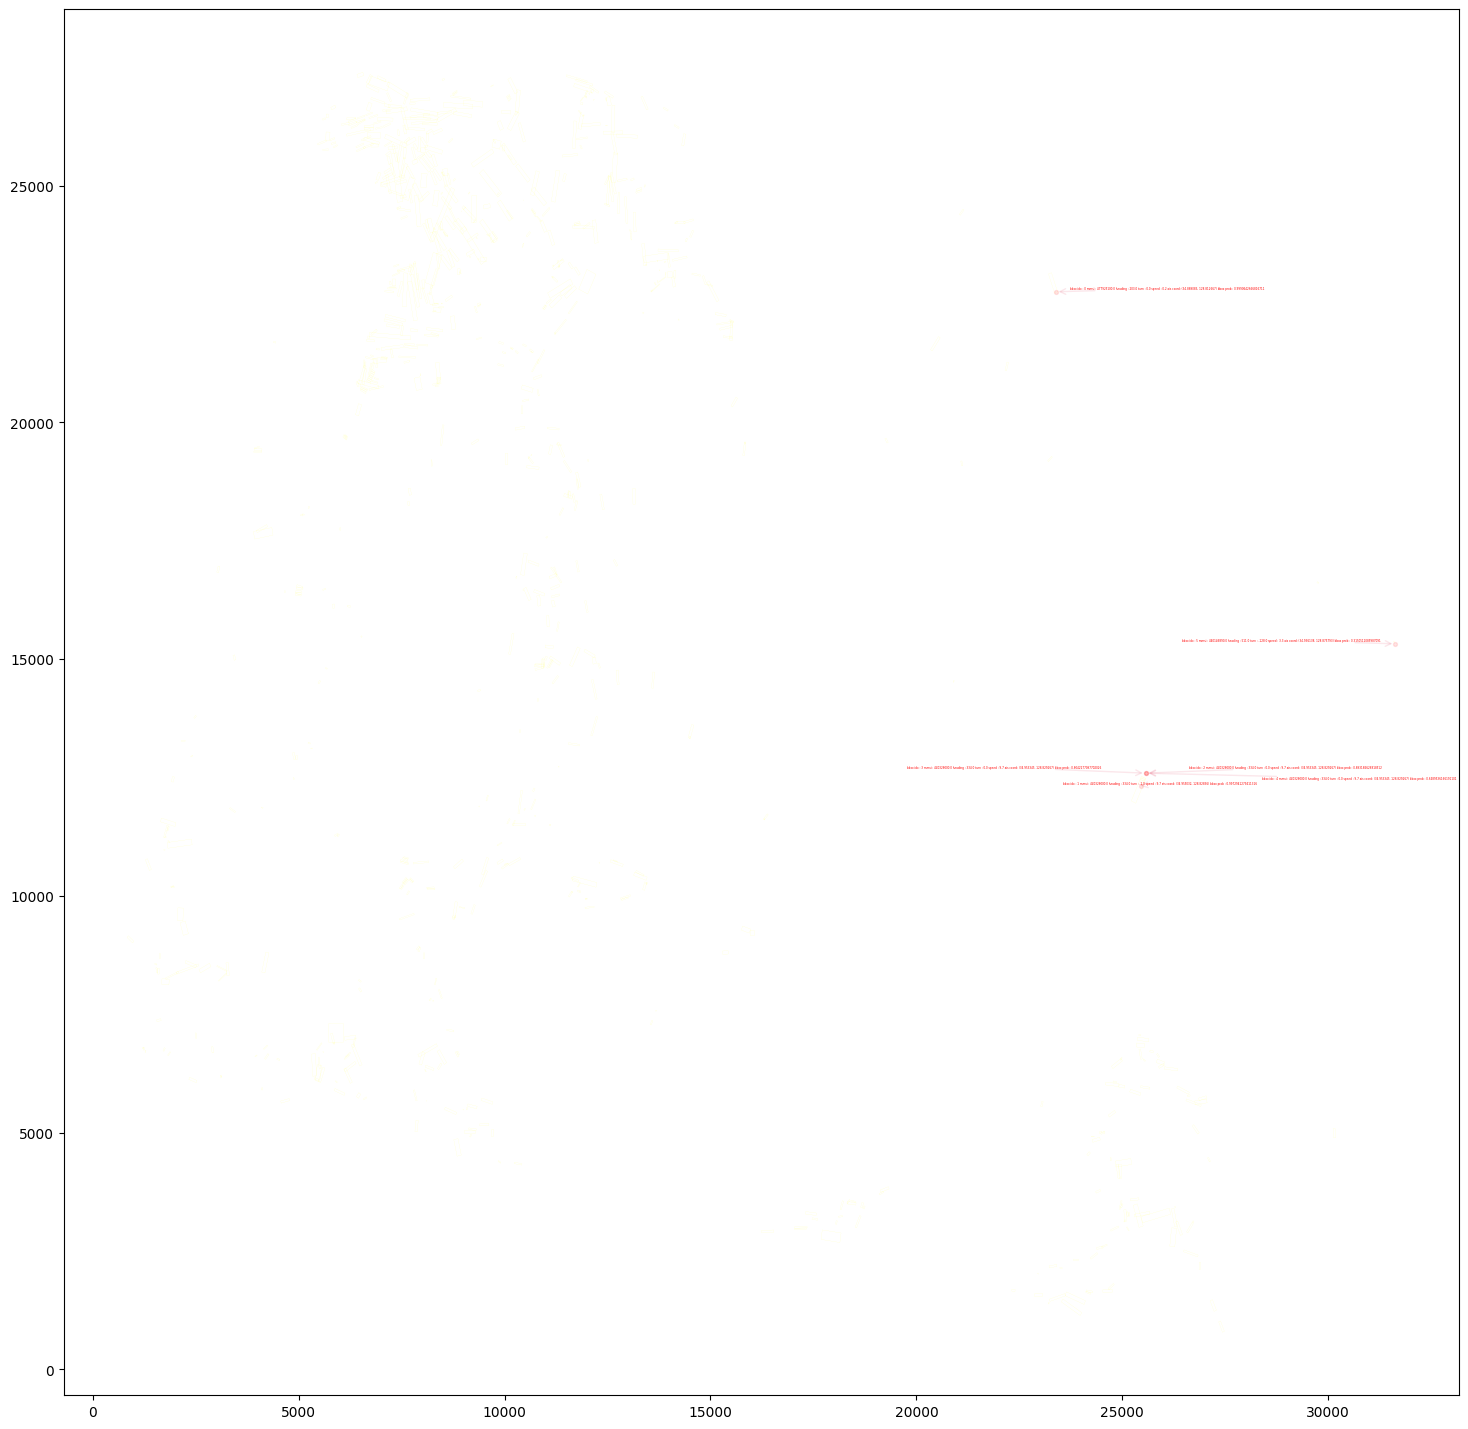

In [31]:
#------------------------------

# Code Backup ! 

#------------------------------
# AIS matching with Bbox

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
from adjustText import adjust_text

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
#plt.imshow(img_)
ax = plt.gca()

# Bounding Box 
# Thresholding filtering 
bboxes_ = [] 
cnt = 0
for r in result[0]:
    if r[-1] > args.infer_threshold_showing:
        cnt+=1
        bboxes_.append(r)

#----------------------------------------------------- 
# BBox matching with AIS 

# Matched Bbox
idx_bboxes = []
x_bboxes = [] 
y_bboxes = []
width_bboxes = []
height_bboxes = []
angle_bboxes = []
prob_bboxes= []

# Matched AIS 
x_matched_ais = []
y_matched_ais = []
time_matched_ais = []
idxss_matched_ais = []
lat_matched_ais = []
long_matched_ais = []

mmsi_matched_ais = []
heading_matched_ais = []
turn_matched_ais = []
speed_matched_ais = []


# 데이터들은 q_df 써서 활용하는 것을 원칙으로 한다. 
x_ais = [i[1] for i in q_df["pixels"].values]
y_ais = [i[0] for i in q_df["pixels"].values]
lat_ais  = [i for i in q_df['lat'].values]
long_ais = [i for i in q_df['long'].values]
mmsi_ = [i for i in q_df['mmsi_'].values]
heading_ = [i for i in q_df['heading_'].values]
turn_ = [i for i in q_df['turn_'].values]
speed_ = [i for i in q_df['speed_'].values]

idx_ais = [i for i in q_df.index.values]
# debugged by Eric 
time_ais = [i for i in q_df['time']]


for bidx, box_ in enumerate( bboxes_):
    x = box_[0]
    y = box_[1]
    width =  box_[2]
    height = box_[3]
    angle_ = box_[4]
    prob_  = box_[5]
    

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, 
                                linewidth=0.1, edgecolor="yellow", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi,
                                alpha=0.35)
    
    ax.add_patch(path_obj)


    #--- find matched AIS with each box 
    cnt =0 
    for a,b,ix,t,lat_,long_,mmsi,heading,turn,speed in zip(x_ais,y_ais,idx_ais,time_ais, lat_ais,long_ais, mmsi_,heading_,turn_,speed_):
        
        # 각 bbox 범위안에 들어오는 ais 중에서 첫번쨰 ais 만 리스트에 저장 
        if cnt ==1:
            break

        # if bbox matched with ais 
        if (x - args.pixel_gap < a < x + args.pixel_gap) & (y - args.pixel_gap < b < y + args.pixel_gap) :
            
            idx_bboxes.append(bidx)
            x_bboxes.append(x)
            y_bboxes.append(y)
            width_bboxes.append(width)
            height_bboxes.append(height)
            angle_bboxes.append(angle_)
            prob_bboxes.append(prob_)

            #-- 
            x_matched_ais.append(a)
            y_matched_ais.append(b)
            time_matched_ais.append(t)
            idxss_matched_ais.append(ix)
            lat_matched_ais.append(lat_)
            long_matched_ais.append(long_)

            #-- 
            mmsi_matched_ais.append(mmsi) 
            heading_matched_ais.append(heading) 
            turn_matched_ais.append(turn) 
            speed_matched_ais.append(speed) 

            cnt+=1


#----------------------- indent over ! 
# 그렇다면 여기에서 통합된 bbox to ais csv 를 만들어버리자. 

if args.Box_Matching  == True:
    T_ = pd.DataFrame({
        "box index" : idx_bboxes,
        "bbox x coord" : x_bboxes,
        "bbox y coord" : y_bboxes,
        "bbox width" : width_bboxes,
        "bbox height" : height_bboxes,
        "bbox angle" : angle_bboxes,
        "bbox prob" : prob_bboxes,
        
        #-- ais
        "mmsi" : mmsi_matched_ais,
        "heading" : heading_matched_ais,
        "turn" : turn_matched_ais,
        "speed" : speed_matched_ais,

        "ais x coord(pixel)" : x_matched_ais,
        "ais y coord(pixel)" : y_matched_ais, 
        "ais lat"   : lat_matched_ais,
        "ais long"  : long_matched_ais,
        "ais time" : time_matched_ais
    })

    T_.drop_duplicates(inplace=True)

    S_ = {
        'box index':[i for i in range(len(bboxes_)) if i not in idx_bboxes],
        'bbox x coord' : [],
        'bbox y coord' : [],
        'bbox width' : [],
        'bbox height' : [],
        'bbox angle' :[],
        'bbox prob' : [],
        "ais x coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais y coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais lat"   : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais long"  : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        "ais time" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
        }

    not_include_boxes = [i for i in range(len(bboxes_)) if i not in idx_bboxes]

    for a in not_include_boxes:
        box_ = bboxes_[a]
        
        S_['bbox x coord'].append(box_[0])
        S_['bbox y coord'].append(box_[1])
        S_['bbox width'].append(box_[2])
        S_['bbox height'].append(box_[3])
        S_['bbox angle'].append(box_[4])
        S_['bbox prob'].append(box_[5])

    S_ = pd.DataFrame(S_)

    M_ = pd.concat([T_,S_])
    #del M_["box index"]
    M_.reset_index(inplace=True,drop=True)


    #----------------
    # Draw matched AIS 
    plt.scatter(x_matched_ais,y_matched_ais, alpha=0.1,color='red',marker='o',s=8)


    #--------------------------------------------
    # among the matched AIS (q_df), label and draw them 
    plt_txts = []

        
    for i,row in M_.iterrows():
        
        a = row['ais lat']
        b = row['ais long']
        c = row['mmsi']
        d = row['heading']
        e = row['turn']
        f = row['speed']
        g = row['bbox prob']

        x = row['ais x coord(pixel)']
        y = row['ais y coord(pixel)']


        if (x ==0) & (y ==0):
            x = row['bbox x coord']
            y = row['bbox y coord']
            name = f'bbox idx : {i}, No matched AIS point'

            #-- matched 가 되지 않은 박스들에는 레이블을 붙이지 않았음 
            #plt_txts.append( plt.text(x, y, name, fontsize =2,color='yellow') )

        else:
            name = f'bbox idx : {i} mmsi : {c} heading : {d} turn : {e} speed : {f} ais coord: {a,b} bbox prob : {g}'
            plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


    #----------------------------------------
    # label overlap avoid 
    adjust_text(plt_txts, 
                force_points=3,
                arrowprops={'arrowstyle' : '->', 
                            'color' : 'crimson',  
                            'alpha' : 0.1}
                )
    # force_points = 3

#---------
# png save and draw
if args.png_draw_save:
    plt.imshow(img_)
    plt.savefig(args.img_output,dpi =1200 )
    plt.show()

# Code Backup ! 

In [32]:
M_

box index  bbox x coord  bbox y coord  bbox width  bbox height  \
0            0  23317.095703  22943.335938  431.388245    77.743073   
1            5  25394.595703  12241.901367  580.068848   119.076927   
2           64  25513.910156  12478.919922   91.645744    27.371304   
3          105  25476.031250  12419.275391   98.669319    36.605633   
4          199  25498.830078  12457.297852  101.729744    31.835896   
..         ...           ...           ...         ...          ...   
812        812  18584.783203   3117.153076  271.632721    38.717365   
813        813  10555.454102  16373.689453  281.704803    66.252861   
814        814  12973.717773  26043.449219  505.467896    67.130646   
815        815  10962.160156  22438.195312   90.138748    29.358643   
816        816  14990.732422  22894.382812  132.540909    22.236656   

     bbox angle  bbox prob         mmsi  heading  turn  speed  \
0     -1.220981   0.999064  477925100.0    203.0   0.0    0.2   
1      1.134190   0.997294  440328000.0    334.0  -1.0    9.7   
2     -0.341464   0.893187  440328000.0    334.0   0.0    9.7   
3     -0.319363   0.804228  440328000.0    334.0   0.0    9.7   
4     -0.295688   0.648954  440328000.0    334.0   0.0    9.7   
..          ...        ...          ...      ...   ...    ...   
812    1.150401   0.202170          NaN      NaN   NaN    NaN   
813   -1.112879   0.201818          NaN      NaN   NaN    NaN   
814   -0.047715   0.200872          NaN      NaN   NaN    NaN   
815    0.867605   0.200576          NaN      NaN   NaN    NaN   
816   -0.202334   0.200064          NaN      NaN   NaN    NaN   

     ais x coord(pixel)  ais y coord(pixel)    ais lat    ais long  \
0                 23384               22756  34.889083  128.812667   
1                 25448               12323  34.955032  128.828360   
2                 25566               12590  34.953345  128.829267   
3                 25566               12590  34.953345  128.829267   
4                 25566               12590  34.953345  128.829267   
..                  ...                 ...        ...         ...   
812                   0                   0   0.000000    0.000000   
813                   0                   0   0.000000    0.000000   
814                   0                   0   0.000000    0.000000   
815                   0                   0   0.000000    0.000000   
816                   0                   0   0.000000    0.000000   

                ais time  
0    2023-10-28 13:32:48  
1    2023-10-28 13:33:29  
2    2023-10-28 13:32:48  
3    2023-10-28 13:32:48  
4    2023-10-28 13:32:48  
..                   ...  
812                    0  
813                    0  
814                    0  
815                    0  
816                    0  

[817 rows x 16 columns]

In [33]:
M_.iloc[0]['ais time']

'2023-10-28 13:32:48'

In [34]:
M_.to_csv(args.csv_output)
M_[0:10]

box index  bbox x coord  bbox y coord  bbox width  bbox height  bbox angle  \
0          0  23317.095703  22943.335938  431.388245    77.743073   -1.220981   
1          5  25394.595703  12241.901367  580.068848   119.076927    1.134190   
2         64  25513.910156  12478.919922   91.645744    27.371304   -0.341464   
3        105  25476.031250  12419.275391   98.669319    36.605633   -0.319363   
4        199  25498.830078  12457.297852  101.729744    31.835896   -0.295688   
5        546  31597.882812  15365.781250   33.494896    14.995516   -0.627865   
6          1   8768.835938  23530.968750  323.882416    65.148811   -0.852356   
7          2  22193.871094  21180.082031  184.727585    37.638367    1.299546   
8          3   8955.104492  24169.072266  319.503448    72.590561   -0.839880   
9          4   8884.071289  24112.875000  332.936768    54.907158   -0.837827   

   bbox prob         mmsi  heading   turn  speed  ais x coord(pixel)  \
0   0.999064  477925100.0    203.0    0.0    0.2               23384   
1   0.997294  440328000.0    334.0   -1.0    9.7               25448   
2   0.893187  440328000.0    334.0    0.0    9.7               25566   
3   0.804228  440328000.0    334.0    0.0    9.7               25566   
4   0.648954  440328000.0    334.0    0.0    9.7               25566   
5   0.315051  440146890.0    511.0 -128.0    3.3               31625   
6   0.998368          NaN      NaN    NaN    NaN                   0   
7   0.998072          NaN      NaN    NaN    NaN                   0   
8   0.997787          NaN      NaN    NaN    NaN                   0   
9   0.997769          NaN      NaN    NaN    NaN                   0   

   ais y coord(pixel)    ais lat    ais long             ais time  
0               22756  34.889083  128.812667  2023-10-28 13:32:48  
1               12323  34.955032  128.828360  2023-10-28 13:33:29  
2               12590  34.953345  128.829267  2023-10-28 13:32:48  
3               12590  34.953345  128.829267  2023-10-28 13:32:48  
4               12590  34.953345  128.829267  2023-10-28 13:32:48  
5               15322  34.936138  128.875793  2023-10-28 13:34:41  
6                   0   0.000000    0.000000                    0  
7                   0   0.000000    0.000000                    0  
8                   0   0.000000    0.000000                    0  
9                   0   0.000000    0.000000                    0

In [35]:
q_df

mmsi_                 time        long        lat  heading_  turn_  \
0   440328000  2023-10-28 13:28:09  128.835178  34.941688     335.0    0.0   
1   440328000  2023-10-28 13:28:29  128.834753  34.942528     335.0    0.0   
2   440328000  2023-10-28 13:29:29  128.833485  34.945050     334.0    0.0   
3   440328000  2023-10-28 13:29:48  128.833087  34.945860     334.0    0.0   
4   440328000  2023-10-28 13:30:08  128.832667  34.946695     334.0    0.0   
5   440328000  2023-10-28 13:30:29  128.832225  34.947560     335.0    0.0   
6   440328000  2023-10-28 13:30:48  128.831827  34.948352     335.0    0.0   
7   440328000  2023-10-28 13:31:08  128.831383  34.949230     334.0   -0.0   
8   440328000  2023-10-28 13:31:48  128.830555  34.950853     334.0   -0.0   
9   440172660  2023-10-28 13:31:52  128.885967  34.992367     255.0    0.0   
10  440328000  2023-10-28 13:32:48  128.829267  34.953345     334.0    0.0   
11  477925100  2023-10-28 13:32:48  128.812667  34.889083     203.0    0.0   
12  440328000  2023-10-28 13:33:08  128.828825  34.954170     334.0    0.0   
13  370025000  2023-10-28 13:33:21  128.778055  34.860250     194.0    2.0   
14  440328000  2023-10-28 13:33:29  128.828360  34.955032     334.0   -1.0   
15  440328000  2023-10-28 13:33:48  128.827940  34.955807     334.0   -0.0   
16  440328000  2023-10-28 13:34:08  128.827465  34.956665     334.0    0.0   
17  440172660  2023-10-28 13:34:33  128.883795  34.992437     260.0    0.0   
18  440146890  2023-10-28 13:34:41  128.875793  34.936138     511.0 -128.0   
19  440328000  2023-10-28 13:34:48  128.826588  34.958250     334.0    0.0   
20  440328000  2023-10-28 13:35:08  128.826142  34.959053     334.0    0.0   
21  440328000  2023-10-28 13:35:29  128.825678  34.959888     334.0    1.0   
22  440172660  2023-10-28 13:35:33  128.882970  34.992492     260.0    0.0   
23  440328000  2023-10-28 13:35:48  128.825262  34.960638     335.0    0.0   
24  440328000  2023-10-28 13:36:29  128.824385  34.962233     335.0    1.0   
25  440328000  2023-10-28 13:37:28  128.823118  34.964527     335.0    0.0   

    speed_            datetime  \
0      9.8 2023-10-28 13:28:09   
1      9.8 2023-10-28 13:28:29   
2      9.8 2023-10-28 13:29:29   
3      9.8 2023-10-28 13:29:48   
4      9.7 2023-10-28 13:30:08   
5      9.7 2023-10-28 13:30:29   
6      9.7 2023-10-28 13:30:48   
7      9.7 2023-10-28 13:31:08   
8      9.7 2023-10-28 13:31:48   
9      2.2 2023-10-28 13:31:52   
10     9.7 2023-10-28 13:32:48   
11     0.2 2023-10-28 13:32:48   
12     9.7 2023-10-28 13:33:08   
13     0.3 2023-10-28 13:33:21   
14     9.7 2023-10-28 13:33:29   
15     9.6 2023-10-28 13:33:48   
16     9.6 2023-10-28 13:34:08   
17     2.3 2023-10-28 13:34:33   
18     3.3 2023-10-28 13:34:41   
19     9.6 2023-10-28 13:34:48   
20     9.5 2023-10-28 13:35:08   
21     9.4 2023-10-28 13:35:29   
22     2.4 2023-10-28 13:35:33   
23     9.3 2023-10-28 13:35:48   
24     9.1 2023-10-28 13:36:29   
25     8.9 2023-10-28 13:37:28   

                                          utm_array          pixels  
0   (484949.05057347036, 3866588.9155630465, 52, N)  (14436, 26333)  
1      (484910.394947157, 3866682.131639439, 52, N)  (14303, 26278)  
2    (484795.07239367574, 3866962.001670247, 52, N)  (13903, 26113)  
3   (484758.87980750954, 3867051.8874851456, 52, N)  (13775, 26062)  
4     (484720.6837359197, 3867144.549202965, 52, N)  (13643, 26007)  
5   (484680.48520527215, 3867240.5413273484, 52, N)  (13506, 25950)  
6    (484644.2915106249, 3867328.4315236155, 52, N)  (13380, 25898)  
7     (484603.9144178435, 3867425.865964536, 52, N)  (13241, 25841)  
8    (484528.6162179101, 3867605.9770527254, 52, N)  (12984, 25733)  
9   (489593.33151830867, 3872202.5332208374, 52, N)   (6425, 32961)  
10  (484411.48544624477, 3867882.5286201043, 52, N)  (12590, 25566)  
11    (482882.5079564369, 3860758.909777679, 52, N)  (22756, 23384)  
12   (484371.2858677624, 3867974.0864119683, 52, N)  (12459, 25509)  
13

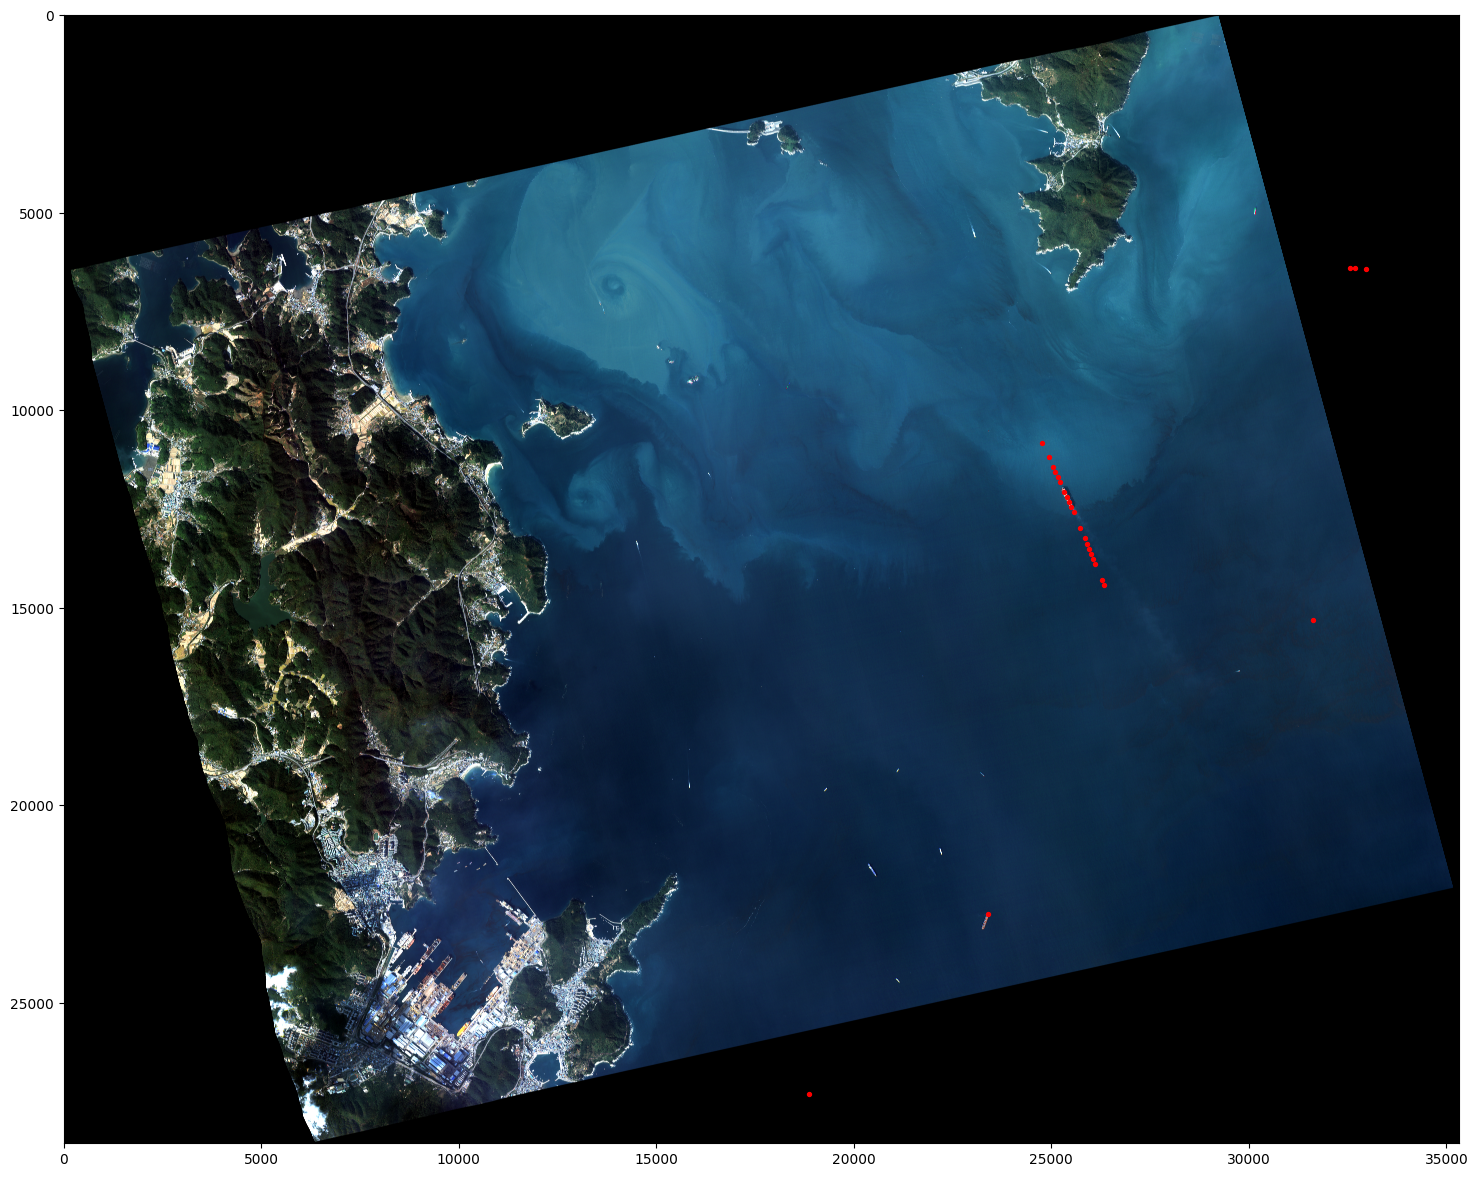

In [36]:
# Scatter Only 
# AIS 

plt.figure(figsize=(18,18))
plt.imshow(img_)
plt.scatter([i[1] for i in q_df['pixels']],[i[0] for i in q_df['pixels']], color='red',marker='o',s=8)

#plt.savefig(args.img_output_scatter,dpi =800)
plt.show()

# Masking BBox in the land 

In [37]:
args.map_path
os.path.exists(args.map_path)

True

------------------- Eric Edited 


<Axes: >

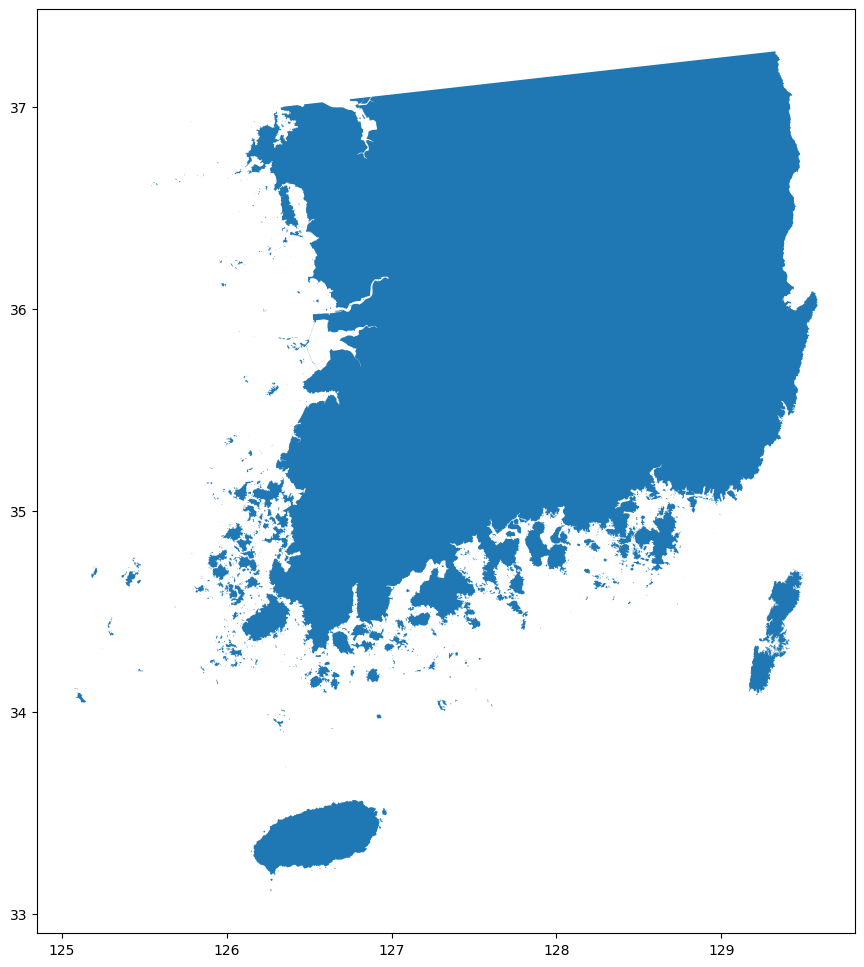

In [38]:
# Visualize Shape File !!
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

gpd.GeoSeries(gdf['geometry']).plot(figsize=(20,12)) #shapefile 플랏


In [39]:
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

# from pixel to utm
tmp_ =[] 
with rasterio.open(tf_path) as map_layer:
    for x,y in zip(M_['bbox x coord'].values, M_['bbox y coord'].values):
        
        x_coord,y_coord = map_layer.xy(y,x) # 여기 순서에 맞춰줘야, long,lat 좌표계가 맞음 
        tmp_.append([x_coord,y_coord])

tmp_1= []
ship_idxs = []
# from utm to latlon 
for idx,co in enumerate(tmp_):
    x,y = co[0],co[1]
    lat,lon = utm.to_latlon(x,y,52,"N")
    # print(lat,lon) # M_ 에서, 미리 설정되었던 AIS와 함께 좌표값 검증하였음

    print("progress : ", idx, " / ",len(tmp_))
    check=gdf['geometry'].contains(Point(lon,lat)) #특정 좌표 (long,lat)이 shapefile 다각형에 포함되는지 확인하기
    checkt=np.where(check == True)[0]
    
    if len(checkt) == 0:
        tmp_1.append(checkt)
        ship_idxs.append(idx)

progress :  0  /  817
progress :  1  /  817
progress :  2  /  817
progress :  3  /  817
progress :  4  /  817
progress :  5  /  817
progress :  6  /  817
progress :  7  /  817
progress :  8  /  817
progress :  9  /  817
progress :  10  /  817
progress :  11  /  817
progress :  12  /  817
progress :  13  /  817
progress :  14  /  817
progress :  15  /  817
progress :  16  /  817
progress :  17  /  817
progress :  18  /  817
progress :  19  /  817
progress :  20  /  817
progress :  21  /  817
progress :  22  /  817
progress :  23  /  817
progress :  24  /  817
progress :  25  /  817
progress :  26  /  817
progress :  27  /  817
progress :  28  /  817
progress :  29  /  817
progress :  30  /  817
progress :  31  /  817
progress :  32  /  817
progress :  33  /  817
progress :  34  /  817
progress :  35  /  817
progress :  36  /  817
progress :  37  /  817
progress :  38  /  817
progress :  39  /  817
progress :  40  /  817
progress :  41  /  817
progress :  42  /  817
progress :  43  /  81

In [40]:
# 마스킹하기 전, 탐색된 선박수
display(M_)

box index  bbox x coord  bbox y coord  bbox width  bbox height  \
0            0  23317.095703  22943.335938  431.388245    77.743073   
1            5  25394.595703  12241.901367  580.068848   119.076927   
2           64  25513.910156  12478.919922   91.645744    27.371304   
3          105  25476.031250  12419.275391   98.669319    36.605633   
4          199  25498.830078  12457.297852  101.729744    31.835896   
..         ...           ...           ...         ...          ...   
812        812  18584.783203   3117.153076  271.632721    38.717365   
813        813  10555.454102  16373.689453  281.704803    66.252861   
814        814  12973.717773  26043.449219  505.467896    67.130646   
815        815  10962.160156  22438.195312   90.138748    29.358643   
816        816  14990.732422  22894.382812  132.540909    22.236656   

     bbox angle  bbox prob         mmsi  heading  turn  speed  \
0     -1.220981   0.999064  477925100.0    203.0   0.0    0.2   
1      1.134190   0.997294  440328000.0    334.0  -1.0    9.7   
2     -0.341464   0.893187  440328000.0    334.0   0.0    9.7   
3     -0.319363   0.804228  440328000.0    334.0   0.0    9.7   
4     -0.295688   0.648954  440328000.0    334.0   0.0    9.7   
..          ...        ...          ...      ...   ...    ...   
812    1.150401   0.202170          NaN      NaN   NaN    NaN   
813   -1.112879   0.201818          NaN      NaN   NaN    NaN   
814   -0.047715   0.200872          NaN      NaN   NaN    NaN   
815    0.867605   0.200576          NaN      NaN   NaN    NaN   
816   -0.202334   0.200064          NaN      NaN   NaN    NaN   

     ais x coord(pixel)  ais y coord(pixel)    ais lat    ais long  \
0                 23384               22756  34.889083  128.812667   
1                 25448               12323  34.955032  128.828360   
2                 25566               12590  34.953345  128.829267   
3                 25566               12590  34.953345  128.829267   
4                 25566               12590  34.953345  128.829267   
..                  ...                 ...        ...         ...   
812                   0                   0   0.000000    0.000000   
813                   0                   0   0.000000    0.000000   
814                   0                   0   0.000000    0.000000   
815                   0                   0   0.000000    0.000000   
816                   0                   0   0.000000    0.000000   

                ais time  
0    2023-10-28 13:32:48  
1    2023-10-28 13:33:29  
2    2023-10-28 13:32:48  
3    2023-10-28 13:32:48  
4    2023-10-28 13:32:48  
..                   ...  
812                    0  
813                    0  
814                    0  
815                    0  
816                    0  

[817 rows x 16 columns]

In [41]:
# visualize the result 
M_masked = M_.iloc[ship_idxs]
del M_masked['box index']
# sav the csv 
M_masked['box index'] = [i for i in range(len(M_masked))]
M_masked = M_masked.reset_index(drop=True)
M_masked.to_csv(args.csv_output_masked)
display(M_masked)

/tmp/ipykernel_159820/3046557337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_masked['box index'] = [i for i in range(len(M_masked))]


bbox x coord  bbox y coord  bbox width  bbox height  bbox angle  \
0    23317.095703  22943.335938  431.388245    77.743073   -1.220981   
1    25394.595703  12241.901367  580.068848   119.076927    1.134190   
2    25513.910156  12478.919922   91.645744    27.371304   -0.341464   
3    25476.031250  12419.275391   98.669319    36.605633   -0.319363   
4    25498.830078  12457.297852  101.729744    31.835896   -0.295688   
..            ...           ...         ...          ...         ...   
225  20904.925781  14530.016602   36.903530    16.787012    1.211910   
226  15578.294922  20426.718750  221.096466    45.518612    0.990395   
227   1741.987427  10970.485352   29.958744    13.427445   -0.123830   
228   8105.963379   5668.580566   10.713667     7.714555    1.106411   
229  10962.160156  22438.195312   90.138748    29.358643    0.867605   

     bbox prob         mmsi  heading  turn  speed  ais x coord(pixel)  \
0     0.999064  477925100.0    203.0   0.0    0.2               23384   
1     0.997294  440328000.0    334.0  -1.0    9.7               25448   
2     0.893187  440328000.0    334.0   0.0    9.7               25566   
3     0.804228  440328000.0    334.0   0.0    9.7               25566   
4     0.648954  440328000.0    334.0   0.0    9.7               25566   
..         ...          ...      ...   ...    ...                 ...   
225   0.205939          NaN      NaN   NaN    NaN                   0   
226   0.203925          NaN      NaN   NaN    NaN                   0   
227   0.203494          NaN      NaN   NaN    NaN                   0   
228   0.202407          NaN      NaN   NaN    NaN                   0   
229   0.200576          NaN      NaN   NaN    NaN                   0   

     ais y coord(pixel)    ais lat    ais long             ais time  box index  
0                 22756  34.889083  128.812667  2023-10-28 13:32:48          0  
1                 12323  34.955032  128.828360  2023-10-28 13:33:29          1  
2                 12590  34.953345  128.829267  2023-10-28 13:32:48          2  
3                 12590  34.953345  128.829267  2023-10-28 13:32:48          3  
4                 12590  34.953345  128.829267  2023-10-28 13:32:48          4  
..                  ...        ...         ...                  ...        ...  
225                   0   0.000000    0.000000                    0        225  
226                   0   0.000000    0.000000                    0        226  
227                   0   0.000000    0.000000                    0        227  
228                   0   0.000000    0.000000                    0        228  
229                   0   0.000000    0.000000                    0        229  

[230 rows x 16 columns]

# Masked Visualization

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/PIL/Image.py:3176: DecompressionBombWarning: Image size (1008255248 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


#-------------- 0.0043
#-------------- 0.0087
#-------------- 0.0130
#-------------- 0.0174
#-------------- 0.0217
#-------------- 0.0261
#-------------- 0.0304
#-------------- 0.0348
#-------------- 0.0391
#-------------- 0.0435
#-------------- 0.0478
#-------------- 0.0522
#-------------- 0.0565
#-------------- 0.0609
#-------------- 0.0652
#-------------- 0.0696
#-------------- 0.0739
#-------------- 0.0783
#-------------- 0.0826
#-------------- 0.0870
#-------------- 0.0913
#-------------- 0.0957
#-------------- 0.1000
#-------------- 0.1043
#-------------- 0.1087
#-------------- 0.1130
#-------------- 0.1174
#-------------- 0.1217
#-------------- 0.1261
#-------------- 0.1304
#-------------- 0.1348
#-------------- 0.1391
#-------------- 0.1435
#-------------- 0.1478
#-------------- 0.1522
#-------------- 0.1565
#-------------- 0.1609
#-------------- 0.1652
#-------------- 0.1696
#-------------- 0.1739
#-------------- 0.1783
#-------------- 0.1826
#-------------- 0.1870
#----------

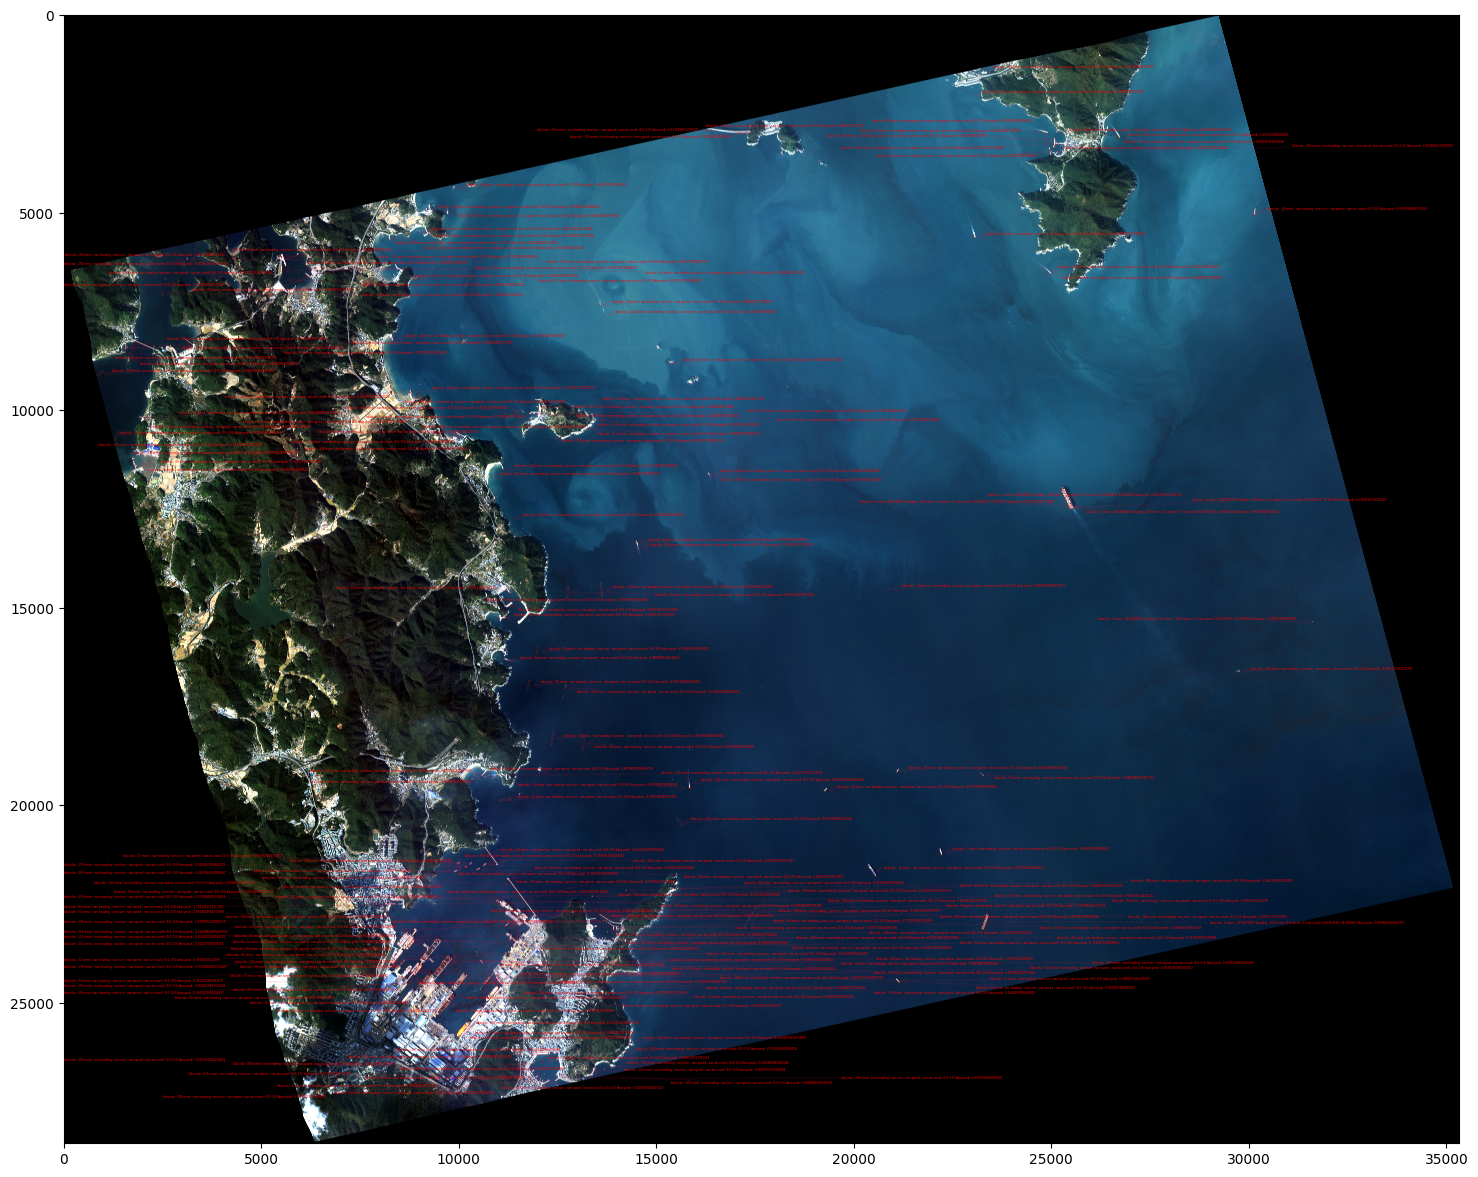

In [42]:
# visualize the result with masking 
# original image 
img_path = args.img_path
img_ = Image.open(img_path)

plt.figure(figsize=(18,18))
plt.imshow(img_)
ax = plt.gca()

#------------------------------------
# Bbox 
bboxes_ = [] 
cnt = 0
box_cnt = 0

# Label
plt_txts = []

# M_masked
for i,row in M_masked.iterrows():
    box_idx = row['box index']
    x = row['bbox x coord']
    y = row['bbox y coord']
    width = row['bbox width']
    height = row['bbox height']
    angle_ = row['bbox angle']
    prob_ = row['bbox prob']

    mmsi_ = row['mmsi']
    heading_ = row['heading']
    turn_ = row['turn']
    speed_ = row['speed']
    lat_ = row['ais lat']
    lon_ = row['ais long']

    
    
    box_cnt+=1
    print(f"#-------------- {box_cnt / len(M_masked):.4f}")
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="red", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)

    # if (lat_ ==0) & (lon_ ==0):
    #     pass
    # else:
    name = f'bbox idx : {box_idx} mmsi : {mmsi_} heading : {heading_} turn : {turn_} speed : {speed_} ais coord: {lon_,lat_} bbox prob : {prob_}'
    plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


adjust_text(plt_txts, 
            force_points=3,
            arrowprops={'arrowstyle' : '->', 
                        'color' : 'crimson',  
                        'alpha' : 0.1}
            )
#------------------------------------

plt.imshow(img_)
#plt.savefig(args.img_output_masked,dpi =1200 )
plt.show()
#------------------------------------

# Extract Chips

In [43]:
# #----- load 
# img_path = args.img_path
# M_chip = pd.read_csv(args.csv_output_masked)

# img_part = Image.open(img_path)
# prefix_ = args.img_path.split("/")[-1].replace(".png","")

# a= os.path.dirname(args.img_path)
# chip_folder = os.path.join(a,"chips")

# if os.path.exists(chip_folder):
#     print("folder exists")
# else:
#     os.mkdir(chip_folder)
#     print("folder created")

In [44]:
#M_chip

In [45]:
#prefix_

In [46]:

# print("#--------------------",len(M_))
# for i,row in M_chip.iterrows():

#     if row["ais time"] != str(0):
#         print({i})
#         box_ = row
#         x = box_["bbox x coord"]
#         y = box_["bbox y coord"]
#         width =  box_["bbox width"]
#         height = box_["bbox height"]
#         angle_ = box_["bbox angle"]
#         box_idx = box_['box index']

#         pixel_slice = 512
#         a_ = img_part.crop(( x-pixel_slice , y-pixel_slice, x+pixel_slice , y+pixel_slice ))
#         #plt.figure(figsize=(18,18))
        
#         folder_ = chip_folder
#         saved_name = f"{box_idx}_{prefix_}.png"
        
        
#         #plt.figure(figsize=(18,18))
#         #plt.savefig(os.path.join(folder_,saved_name),dpi =600 )
#         a_.save(os.path.join(folder_,saved_name))
#         plt.imshow(a_)
    

In [47]:
# import subprocess


# zip_command = ["zip", "-jr","chips_v2.zip", folder_]

# try:    
#     subprocess.run(zip_command, check=True,cwd=folder_.replace("/chips",""))
#     print("Zip operation successful.")
# except subprocess.CalledProcessError as e:
#     print(f"Error during zip operation: {e}")